<a href="https://colab.research.google.com/github/he-ale/data-science/blob/main/AutoMPG/AutoMPG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ucimlrepo

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [4]:
plt.style.use('bmh')

In [5]:
auto_mpg = fetch_ucirepo(id=9)

In [6]:
X = auto_mpg.data.features
y = auto_mpg.data.targets

In [7]:
dataframe= X.join(y)

In [8]:
dataframe

,displacement,cylinders,horsepower,weight,acceleration,model_year,origin,mpg
0,307.0,8,130.0,3504,12.0,70,1,18.0
1,350.0,8,165.0,3693,11.5,70,1,15.0
2,318.0,8,150.0,3436,11.0,70,1,18.0
3,304.0,8,150.0,3433,12.0,70,1,16.0
4,302.0,8,140.0,3449,10.5,70,1,17.0
...,...,...,...,...,...,...,...,...
393,140.0,4,86.0,2790,15.6,82,1,27.0
394,97.0,4,52.0,2130,24.6,82,2,44.0
395,135.0,4,84.0,2295,11.6,82,1,32.0
396,120.0,4,79.0,2625,18.6,82,1,28.0


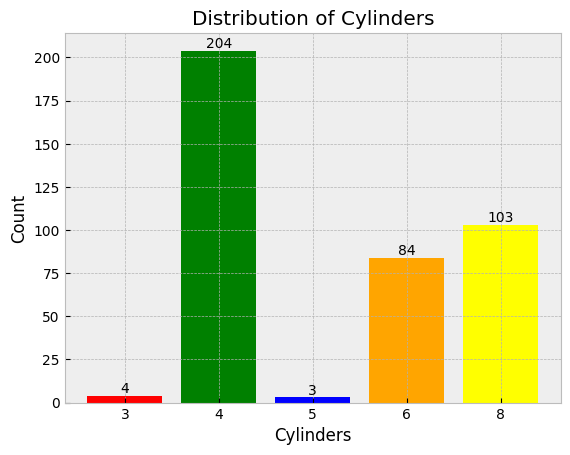

In [9]:
labels= dataframe.groupby('cylinders').count().index.astype(str)
cylinders= dataframe.groupby('cylinders').count()['mpg']

fig, ax = plt.subplots()
# fig.patch.set_facecolor('beige')
# ax.set_facecolor('beige')
bars= ax.bar(labels, cylinders, color=['red', 'green', 'blue', 'orange', 'yellow'])
ax.set_xlabel('Cylinders')
ax.set_ylabel('Count')
ax.set_title('Distribution of Cylinders')
for bar in bars:
    height= bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height, str(height), ha='center', va='bottom')

plt.show()

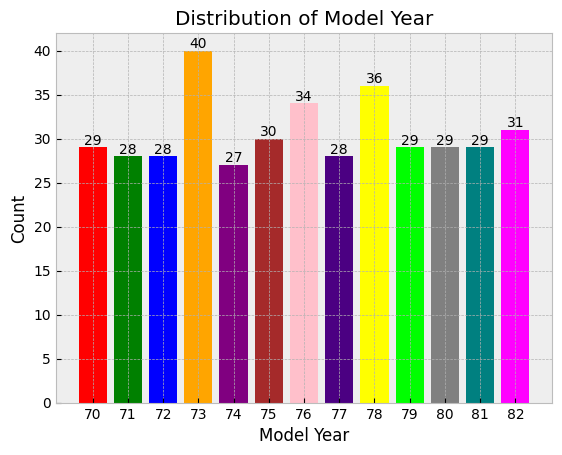

In [10]:
model_year= dataframe.groupby('model_year').count()['mpg']
labels= dataframe.groupby('model_year').count().index.astype(str)
colors = ['red', 'green', 'blue', 'orange', 'purple', 'brown', 'pink',
          'indigo', 'yellow', 'lime', 'grey', 'teal', 'magenta']
fig, ax = plt.subplots()
# fig.patch.set_facecolor('beige')
# ax.set_facecolor('beige')
bars= ax.bar(labels, model_year,color= colors)
ax.set_xlabel('Model Year')
ax.set_ylabel('Count')
ax.set_title('Distribution of Model Year')
for bar in bars:
    height= bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height, str(height), ha='center', va='bottom')

plt.show()

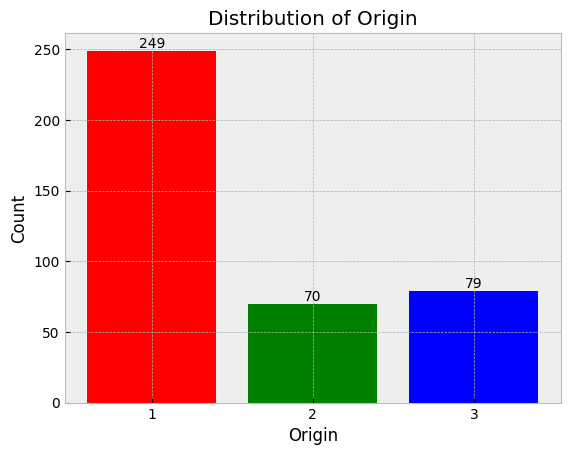

In [11]:
origin= dataframe.groupby('origin').count()['mpg']
labels= dataframe.groupby('origin').count().index.astype(str)
colors = ['red', 'green', 'blue']
fig, ax = plt.subplots()
ax.set_xlabel('Origin')
ax.set_ylabel('Count')
ax.set_title('Distribution of Origin')
bars= ax.bar(labels, origin, color= colors)
for bar in bars:
    height= bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height, str(height), ha='center', va='bottom')

plt.show()

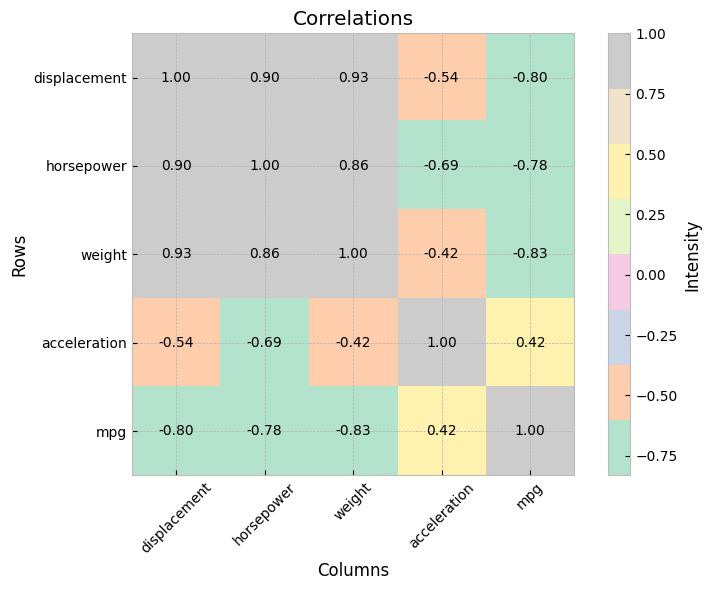

In [12]:
data= dataframe.corr().iloc[[0,2,3,4,7],[0,2,3,4,7]].values
cols=list(filter(lambda e: not e in['cylinders','model_year', 'origin'], dataframe.columns.values))

fig, ax = plt.subplots(figsize=(8, 6))
# fig.patch.set_facecolor('beige')
# ax.set_facecolor('beige')
cax = plt.imshow(data, cmap='Pastel2', interpolation='nearest')

cbar = plt.colorbar(cax)
cbar.set_label('Intensity')

ax.set_xticks(np.arange(len(cols)))
ax.set_yticks(np.arange(len(cols)))
ax.set_xticklabels(cols)
ax.set_yticklabels(cols)

# Añadir título y etiquetas
plt.xticks(rotation=45)

for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        ax.text(j, i, f'{data[i, j]:.2f}', ha='center', va='center', color='black', fontsize=10)

ax.set_title('Correlations')
ax.set_xlabel('Columns')
ax.set_ylabel('Rows')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [13]:
dataframe.drop(['cylinders'], axis=1, inplace=True)

In [14]:
dataframe

,displacement,horsepower,weight,acceleration,model_year,origin,mpg
0,307.0,130.0,3504,12.0,70,1,18.0
1,350.0,165.0,3693,11.5,70,1,15.0
2,318.0,150.0,3436,11.0,70,1,18.0
3,304.0,150.0,3433,12.0,70,1,16.0
4,302.0,140.0,3449,10.5,70,1,17.0
...,...,...,...,...,...,...,...
393,140.0,86.0,2790,15.6,82,1,27.0
394,97.0,52.0,2130,24.6,82,2,44.0
395,135.0,84.0,2295,11.6,82,1,32.0
396,120.0,79.0,2625,18.6,82,1,28.0


In [15]:
!pip install scikit-learn

In [34]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

In [39]:
# X2= dataframe.iloc[:,:-1].values
# y2= dataframe.iloc[:,-1].values
# ct2= ColumnTransformer(
#     transformers=[
#         ('encoder', OneHotEncoder(drop='first'), [4,5]),
#         ('scaler', StandardScaler(), [0,1,2,3])
#     ]
# )
# X2=ct2.fit_transform(X2)

In [41]:
ct = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(drop='first'), ['model_year', 'origin']),
        ('scaler', StandardScaler(), ['displacement', 'horsepower', 'weight', 'acceleration'])
    ]
)
y= dataframe.iloc[:,-1].values
scaler= StandardScaler()
y= scaler.fit_transform(y.reshape(-1,1))
y= y.ravel()
X=ct.fit_transform(dataframe)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
y

array([-7.06438701e-01, -1.09075062e+00, -7.06438701e-01, -9.62646649e-01,
       -8.34542675e-01, -1.09075062e+00, -1.21885460e+00, -1.21885460e+00,
       -1.21885460e+00, -1.09075062e+00, -1.09075062e+00, -1.21885460e+00,
       -1.09075062e+00, -1.21885460e+00,  6.21851453e-02, -1.94022803e-01,
       -7.06438701e-01, -3.22126778e-01,  4.46497068e-01,  3.18393094e-01,
        1.90289120e-01,  6.21851453e-02,  1.90289120e-01,  3.18393094e-01,
       -3.22126778e-01, -1.73127050e+00, -1.73127050e+00, -1.60316652e+00,
       -1.85937447e+00,  4.46497068e-01,  5.74601043e-01,  1.90289120e-01,
        1.90289120e-01, -5.78334726e-01, -9.62646649e-01, -8.34542675e-01,
       -5.78334726e-01, -7.06438701e-01, -1.21885460e+00, -1.21885460e+00,
       -1.21885460e+00, -1.21885460e+00, -1.47506255e+00, -1.34695857e+00,
       -1.34695857e+00, -7.06438701e-01, -1.94022803e-01, -5.78334726e-01,
       -7.06438701e-01, -6.59188290e-02,  5.74601043e-01,  8.30808991e-01,
        8.30808991e-01,  